                                      ISE 5123: Software Tools-Dec Support

                                    Final Examination Answer Script - 2021 
                                         Author: Himadri Sen Gupta 

Solution | Question - 1

In [6]:
#Taking the number of element of the list
n = int(input("Enter the number of members in the list: "))

#Creating a blank list for keeping all the elements 
new_list = []

#Taking the input for the list 
if n > 0:
    for i in range(n): 
        x = int(input("Enter the numbers for the list: "))
        new_list.append(x)
else: 
    new_list = []

#Showing the list 
print(new_list)

#Creating the function sorted 
def sorted (list_for_sort):
    check = 0      #This variable is taken for identifying the list
    i = 1          #This variable will ensure checking all the elements of the list till the last one 
    #i = 1 ensure that it will start checking the second element of the list with the first one. 
    while i < len(list_for_sort):
        if list_for_sort[i] > list_for_sort[i - 1]:
            check = 1
        i += 1   #i is increasing to check the next element 
    #Printing the results
    if check == 0:   #If the list is in decending order the check value should be 0 
        print ("TRUE")          
    else :           #If the list is not in decending order the check value should be 1 in while loop  
        print ("FALSE")               

#Implementation of the sorted function- 
sorted (new_list)    

Enter the number of members in the list: 4
Enter the numbers for the list: 2
Enter the numbers for the list: 2
Enter the numbers for the list: 1
Enter the numbers for the list: 1
[2, 2, 1, 1]
TRUE


Solution | Question - 2

In [116]:
#Importing Gurobi for solving the model 
from gurobipy import *
from texttable import Texttable

#Creating the list of nodes i 
months = ['1','2','3','4','5']   #We are working with 5 Months 

production_cost = 10 

over_time_cost = 15

inventory_cost = 2


#Mathemaical Model directly taken from lecture note--


# Create the model as an object
model = Model ("Problem - 2")

# Mute the Gurobi
model.setParam ('OutputFlag', False)


# Decision Variables----
Normal_Production = model.addVars(months, vtype=GRB.INTEGER, lb=0,ub=GRB.INFINITY, name="x") 

OverTime_Production = model.addVars(months, vtype=GRB.INTEGER, lb=0,ub=GRB.INFINITY, name="y")

Invertory_Amount = model.addVars(months, vtype=GRB.INTEGER, lb=0,ub=GRB.INFINITY, name="w")



#Production Capacity Constraint-----      
for i in months: 
    model.addConstr(Normal_Production[i] <= 2000) 

#Over Time Production Capacity Constraint----- 
for i in months:
    model.addConstr(OverTime_Production[i] <= 600)

#Contracted Sales in Month - 1 
model.addConstr(Normal_Production['1']  + OverTime_Production['1'] - Invertory_Amount['1'] == 1200)

#Contracted Sales in Month - 2
model.addConstr(Normal_Production['2']  + OverTime_Production['2'] + Invertory_Amount['1'] - Invertory_Amount['2'] == 2100)

#Contracted Sales in Month - 3
model.addConstr(Normal_Production['3']  + OverTime_Production['3'] + Invertory_Amount['2'] - Invertory_Amount['3'] == 2400)

#Contracted Sales in Month - 4
model.addConstr(Normal_Production['4']  + OverTime_Production['4'] + Invertory_Amount['3'] - Invertory_Amount['4'] == 3000)

#Contracted Sales in Month - 5
model.addConstr(Normal_Production['5']  + OverTime_Production['5'] + Invertory_Amount['4'] == 4000)


#Define the objective function
z = quicksum(production_cost * Normal_Production[i] + over_time_cost * OverTime_Production[i] + inventory_cost * Invertory_Amount[i] for i in months)

# Specify the type of the model: minimization or maximization
model.setObjective (z, GRB.MINIMIZE)

# Update the model
model.update()

# Solve the model    
model.optimize()     



# Print out the optimal solutions: the decion variables values
if model.status==GRB.OPTIMAL:
    
    print ("-----------------------------------------")
    print ("Optimal value: $",model.objVal)
    print ("-----------------------------------------")
    Results = Texttable()
    result_header = ["Months", "Regular Production Amount (units)", "Overtime Production Amount (units)", "Amount Kept in Inventory (units)"]
    Results.add_row(result_header)
    for i in months: 
        Results.add_row([i,Normal_Production[i].X, OverTime_Production[i].X, Invertory_Amount[i].X])
    print(Results.draw())   
        
        
        
#         print ("Decision for the Month", i)
#         print ("Regular Production Amount in Month", i, "is --->",  Normal_Production[i].X)
#         print ("Over Time Production Amount in Month", i, "is --->",OverTime_Production[i].X)
#         print ("Inventory Kept in Month", i, "is --->",Invertory_Amount[i].X)
#         print ("\n")


-----------------------------------------
Optimal value: $ 152300.0
-----------------------------------------
+--------+-----------------------+----------------------+----------------------+
| Months | Regular Production    | Overtime Production  | Amount Kept in       |
|        | Amount (units)        | Amount (units)       | Inventory (units)    |
+--------+-----------------------+----------------------+----------------------+
| 1      | 2000                  | 300                  | 1100                 |
+--------+-----------------------+----------------------+----------------------+
| 2      | 2000                  | 600                  | 1600                 |
+--------+-----------------------+----------------------+----------------------+
| 3      | 2000                  | 600                  | 1800                 |
+--------+-----------------------+----------------------+----------------------+
| 4      | 2000                  | 600                  | 1400                 |

Solution | Question - 3

-----------------------------------------
Optimal value: $ 12705.0
-----------------------------------------
+--------------+-------------+----------------+
| Origin       | Destination | Amount Shipped |
+--------------+-------------+----------------+
| Pennsylvania | Indiana     | 27000          |
+--------------+-------------+----------------+
| Pennsylvania | Georgia     | 9000           |
+--------------+-------------+----------------+
| Indiana      | Kentucky    | 12000          |
+--------------+-------------+----------------+
| Indiana      | Lousiana    | 15000          |
+--------------+-------------+----------------+
| Georgia      | Virginia    | 9000           |
+--------------+-------------+----------------+



This is the Entire Possible Product Distribution Network for the Studied Company


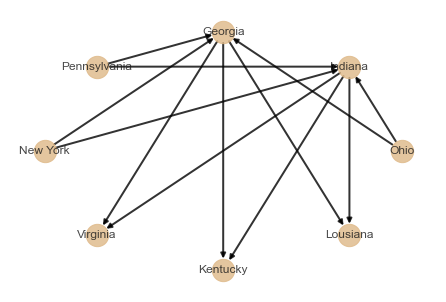




This is the Optimal Product Distribution Network for the Studied Company


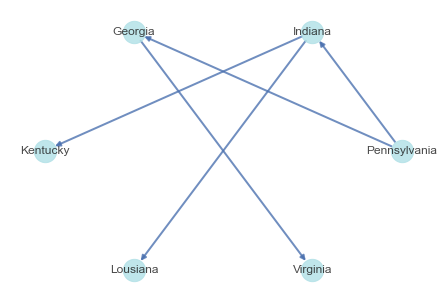

In [140]:
#Importing Gurobi for solving the model 
from gurobipy import *
from texttable import Texttable
#Importing NetworkX and Matplotlib for depicting the network
import networkx as nx
import matplotlib.pyplot as plt

#Creating the list of nodes i 
nodes = ['Ohio', 'Pennsylvania', 'New York', 'Indiana', 'Georgia', 'Virginia', 'Kentucky', 'Lousiana']

#This multi-dict is used defining the arcs and cost related to that arcs 
arcs, cost = multidict({('Ohio', 'Indiana') : 0.41/2, 
                        ('Ohio','Georgia') : 0.57/2,
                        ('Pennsylvania','Indiana' ) : 0.37/2,
                        ('Pennsylvania','Georgia' ) : 0.48/2,
                        ('New York','Indiana' ) : 0.51/2,
                        ('New York', 'Georgia') : 0.60/2,
                        ('Indiana', 'Virginia'): 0.22,
                        ('Indiana', 'Kentucky'): 0.10,
                        ('Indiana', 'Lousiana'): 0.20, 
                        ('Georgia', 'Virginia') : 0.15, 
                        ('Georgia', 'Kentucky') : 0.16,
                        ('Georgia', 'Lousiana') : 0.18})

#This variable shows the demand and supply of earch nodes, positive value  means that the node is supply node and neegative value means demand nodes

in_flow =  {'Ohio' : 24000*2, 
            'Pennsylvania': 18000*2, 
            'New York': 32000*2, 
            'Indiana': 0,
            'Georgia': 0, 
            'Virginia': -9000, 
            'Kentucky': -12000,
            'Lousiana' : -15000 }



# Create the model as an object
model = Model ("transportation")

# Mute the Gurobi
model.setParam ('OutputFlag', False)


# Create the decison variables for each link
X = model.addVars(arcs, vtype=GRB.INTEGER, lb=0,ub=GRB.INFINITY, name="x")


#Capacity constraints for the 
model.addConstr( X['Ohio', 'Indiana'] + X['Pennsylvania','Indiana'] + X['New York','Indiana'] <= 48000*2)

model.addConstr( X['Ohio', 'Georgia'] + X['Pennsylvania','Georgia'] + X['New York','Georgia'] <= 35000*2)

#Flow balance constraints 
for i in nodes:
    model.addConstr((quicksum(X[i,j] for i,j in arcs.select (i,'*')) - quicksum(X[j, i] for j, i in arcs.select ('*', i)) <= in_flow[i]));
          

#Define the objective function
z = quicksum(X[i,j] * cost[i,j] for i,j in arcs)

# Specify the type of the model: minimization or maximization
model.setObjective (z, GRB.MINIMIZE)

# Update the model
model.update()

# Solve the model    
model.optimize()     
        
# Print out the optimal solutions: the decion variables values
model.printAttr ('x') 

# Print out the outputs

# Print out the outputs
new_arcs = []
Results = Texttable()
result_header = ["Origin", "Destination", "Amount Shipped"]
if model.status==GRB.OPTIMAL:
    print ("-----------------------------------------")
    print ("Optimal value: $",model.objVal)
    print ("-----------------------------------------")
    #print ("--- Quantity (origin to destination)---")

    Results.add_row(result_header)
    for i, j  in arcs: 
        if X[i,j].X > 0:
            Results.add_row([i,j, X[i,j].X])
            #print ("From",i, "To ", j, X[i,j].X)
    print(Results.draw())
        
    for i, j in arcs: 
        if X[i,j].X > 0: 
            new_arcs.append((i,j))
                

                
print("\n\n\nThis is the Entire Possible Product Distribution Network for the Studied Company")           
F = nx.DiGraph()

F.add_edges_from(arcs)

pos = nx.spring_layout(F)   

nx.draw_circular(F, edge_color='black',node_shape = 'o', width=2,node_size=500,node_color='burlywood', alpha=0.8,\
labels={node:node for node in F.nodes()})

plt.show()
                    
            
#print(new_arcs)
print("\n\n\nThis is the Optimal Product Distribution Network for the Studied Company")           
G = nx.DiGraph()

G.add_edges_from(new_arcs)

pos = nx.spring_layout(G)   

nx.draw_circular(G, edge_color='b',node_shape = 'o', width=2,node_size=500,node_color='powderblue', alpha=0.8,\
labels={node:node for node in G.nodes()})

plt.show()


            


Solution | Question - 4 (a)

  Gender  Age Music preference  Height
0      f   65              Rap     158
1      f   24      Alternative     152
2      f   56    Rock and Roll     153
3      f   70          Country     160
4      f   26        Classical     156
                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     4.536
Date:                Thu, 13 May 2021   Prob (F-statistic):             0.0357
Time:                        21:53:33   Log-Likelihood:                -410.49
No. Observations:                  99   AIC:                             825.0
Df Residuals:                      97   BIC:                             830.2
Df Model:                           1                                         
Covariance Type:            nonrobust                  

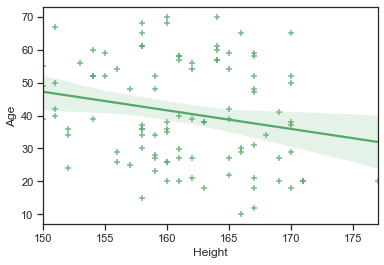

In [142]:
#Importing all necessary libraries for running code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm

#Imported that as dataframe using pandas 
data = pd.read_excel("FinalExamData.xls", names = ['Gender', 'Age', 'Music preference', 'Height'])
df = pd.DataFrame(data)

#Setting some design
sns.set_theme()
sns.set_style("ticks")

#Taking x and y axis 
y = pd.Series(df["Age"], name="Age")

x = pd.Series(df["Height"], name="Height")

#Create the histogram 
ax = sns.regplot(x=x, y=y, marker="+",color="g", n_boot=500, y_jitter=.03)


#Add an intercept to the regression model
x=sm.add_constant(df['Height']) 
#OLS: Ordinary least square
model = sm.OLS(df['Age'],x).fit() 
#make the predictions by the model
predictions = model.predict(x)  
#Print summary 
print (model.summary())


Solution | Question - 4 (b)

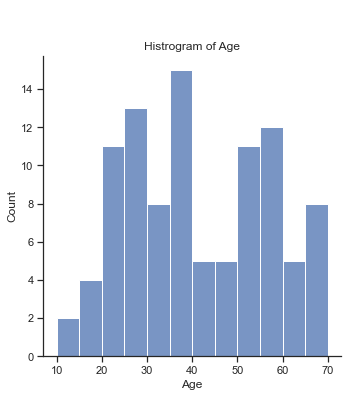

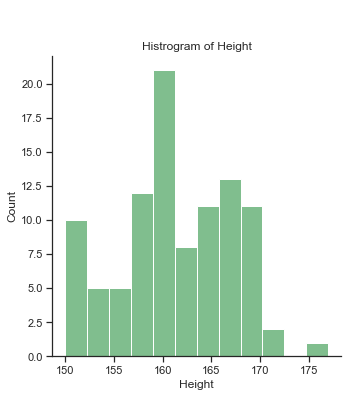

In [148]:
#Importing all necessary libraries for running code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#Imported excel file as dataframe using pandas 
data = pd.read_excel("FinalExamData.xls", names = ['Gender', 'Age', 'Music preference', 'Height'])
df = pd.DataFrame(data)

#Setting background 
sns.set_theme()
sns.set_style("ticks")

#Creating histrogram for age 
sns.displot(df, x="Age", bins=12, color = 'b').set(title = "\n\n\nHistrogram of Age")

#Creating histogram for height 
sns.displot(df, x="Height", bins=12, color = 'g').set(title = "\n\n\nHistrogram of Height")


Solution | Question - 4 (c)

In [1]:
#Importing all necessary libraries for running code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#Imported excel as dataframe using pandas 
data = pd.read_excel("FinalExamData.xls", names = ['Gender', 'Age', 'Music preference', 'Height'])
df = pd.DataFrame(data)
print(df.head())

Type = dict(df["Music preference"].value_counts())

# Data to plot
labels = []
sizes = []


for x, y in Type.items():
    labels.append(x)
    sizes.append(y)
    
#Showing the percentage data in table 
Results = Texttable()
result_header = ["Music Preference", "Percentage"]
Results.add_row(result_header)
for i in range(len(sizes)): 
    p = sizes[i]*100/total
    Results.add_row([labels[i], (str(p) + " %")])
print(Results.draw())
print("\n\n\n\n")

#Creating the pie chart 
plt.pie(sizes, labels=labels, autopct='%2.2f%%', shadow=True, startangle=-50)
plt.legend(labels,title="Music Preference",loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')
plt.title("Parcentage of Each Music Preference")
plt.show()
plt.savefig("exam.png", dpi= 150) 
print("\n\n\n\n")

  Gender  Age Music preference  Height
0      f   65              Rap     158
1      f   24      Alternative     152
2      f   56    Rock and Roll     153
3      f   70          Country     160
4      f   26        Classical     156


NameError: name 'Texttable' is not defined